In [7]:
import os
import sys
cwd = os.getcwd()

#Numpy is linear algebra lbrary
import numpy as np
# Matplotlib is a visualizations library 
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torchvision
from torchvision import transforms
import torchvision.utils as vutils


In [12]:
def load_data():
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    batch_size = 4

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                                download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                                shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                                shuffle=False, num_workers=2)
    classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    return trainloader

In [10]:

class DiscriminatorNet(torch.nn.Module):
    """
    A three hidden-layer discriminative neural network
    """

    def __init__(self):
        super(DiscriminatorNet, self).__init__()
        n_features = 3072
        n_out = 1

        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 1024),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.out = nn.Sequential(
            torch.nn.Linear(256, n_out),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x


class GeneratorNet(torch.nn.Module):
    """
    A three hidden-layer generative neural network
    """

    def __init__(self):
        super(GeneratorNet, self).__init__()
        n_features = 100
        n_out = 3072

        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.ReLU()
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(256, 512),
            nn.ReLU()
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.ReLU()
        )

        self.out = nn.Sequential(
            nn.Linear(1024, n_out),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x

Files already downloaded and verified
Files already downloaded and verified


/opt/homebrew/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")
/opt/homebrew/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


Epoch: [0/1], Batch Num: [0/12500]
Discriminator Loss: 1.3875, Generator Loss: 0.6692
D(x): 0.5105, D(G(z)): 0.5108
------------------------------
Epoch: [0/1], Batch Num: [50/12500]
Discriminator Loss: 0.4436, Generator Loss: 1.5065
D(x): 0.8810, D(G(z)): 0.2592
------------------------------
Epoch: [0/1], Batch Num: [100/12500]
Discriminator Loss: 0.3918, Generator Loss: 1.8224
D(x): 0.8682, D(G(z)): 0.2117
------------------------------
Epoch: [0/1], Batch Num: [150/12500]
Discriminator Loss: 0.6842, Generator Loss: 0.7419
D(x): 0.9937, D(G(z)): 0.4917
------------------------------
Epoch: [0/1], Batch Num: [200/12500]
Discriminator Loss: 0.4514, Generator Loss: 1.3448
D(x): 0.9766, D(G(z)): 0.3467
------------------------------
Epoch: [0/1], Batch Num: [250/12500]
Discriminator Loss: 0.4158, Generator Loss: 1.1041
D(x): 0.9947, D(G(z)): 0.3324
------------------------------
Epoch: [0/1], Batch Num: [300/12500]
Discriminator Loss: 0.1806, Generator Loss: 2.0949
D(x): 0.9999, D(G(z))

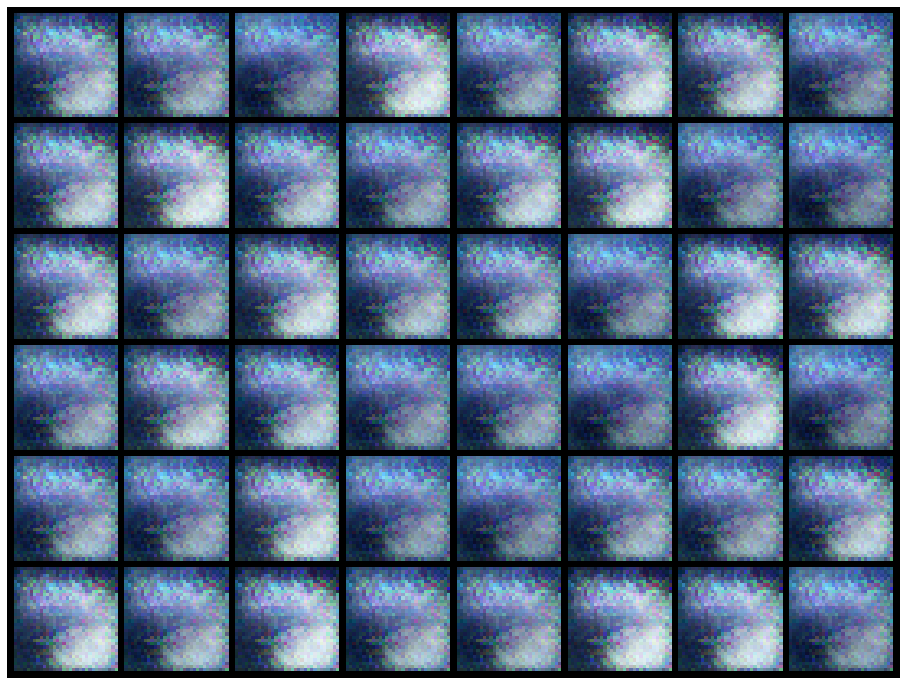

In [13]:
def train_discriminator(discriminator, optimizer, real_data, fake_data, loss):
    N = real_data.size(0)
    # Reset gradients
    optimizer.zero_grad()

    # Train on Real Data
    prediction_real = discriminator(real_data)
    # Calculate error and backpropagate
    error_real = loss(prediction_real, Variable(torch.ones(N, 1)))
    error_real.backward()

    # Train on Fake Data
    prediction_fake = discriminator(fake_data)
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake, Variable(torch.zeros(N, 1)))
    error_fake.backward()

    # Update weights with gradients
    optimizer.step()

    # Return error and predictions for real and fake inputs
    return error_real + error_fake, prediction_real, prediction_fake


def train_generator(discriminator, optimizer, fake_data, loss):
    # Reset gradients
    N = fake_data.size(0)  
    
    # Sample noise and generate fake data
    optimizer.zero_grad()  
    
    # Calculate error and backpropagate
    prediction = discriminator(fake_data)  
    error = loss(prediction, Variable(torch.ones(N, 1)))
    
    # Update weights with gradients
    error.backward()  
    optimizer.step()  
    
    # Return error
    return error


def train():

    # Models, optimizers and losses
    discriminator = DiscriminatorNet()
    generator = GeneratorNet()
    loss_d = nn.BCELoss()
    loss_g = nn.BCELoss()
    d_optimizer = optim.Adam(discriminator.parameters(), 0.0002)
    g_optimizer = optim.Adam(generator.parameters(), 0.0002)

    data_loader = load_data()
    
    num_epochs=1
    num_batches = len(data_loader)
    
    num_test_samples = 48
    test_noise = noise(num_test_samples)


    for epoch in range(num_epochs):
        for n_batch, data in enumerate(data_loader):

            (real_batch, labels) = data
            N = real_batch.size(0)

            # 1. Train Discriminator
            real_data = real_batch.view(real_batch.size(0), -1)

            # Generate fake data and detach so gradients are not calculated for generator)
            latent_space_data = noise(N)
            fake_data = generator(latent_space_data).detach()

            d_error, d_pred_real, d_pred_fake = train_discriminator(discriminator, d_optimizer, real_data,
                                                                          fake_data,
                                                                          loss_d)
            # 2. Train Generator

            # Generate fake data TO train Generator
            latent_space_data = noise(N)
            fake_data = generator(latent_space_data)
            # Train G
            g_error = train_generator(discriminator, g_optimizer, fake_data, loss_g)  # Log batch error

            
            if n_batch % 50 == 0:
                print('Epoch: [{}/{}], Batch Num: [{}/{}]'.format(
                            epoch, num_epochs, n_batch, num_batches)
                    )
                print('Discriminator Loss: {:.4f}, Generator Loss: {:.4f}'.format(d_error, g_error))
                print('D(x): {:.4f}, D(G(z)): {:.4f}'.format(d_pred_real.mean(), d_pred_fake.mean()))
                print('------------------------------')
                
              
    
    print('Training finished')
    
    #Generate images
    test_images = vectors_to_images(generator(test_noise))
    test_images = test_images.data
    log_images(test_images,test_images.size()[0])
    
train()


In [8]:

def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 3, 32, 32)

def noise(size):
    '''
    Generates a 1-d vector of gaussian sampled random values
    '''
    n = torch.randn(size, 100)
    return n

def log_images(images, num_images, format='NCHW', normalize=True):
    '''
    input images are expected in format (NCHW)
    '''
    if type(images) == np.ndarray:
        images = torch.from_numpy(images)

    if format == 'NHWC':
        images = images.transpose(1, 3)

    

    # Make horizontal grid from image tensor
    horizontal_grid = vutils.make_grid(
        images, normalize=normalize, scale_each=True)
    # Make vertical grid from image tensor
    nrows = int(np.sqrt(num_images))
    grid = vutils.make_grid(
        images, nrow=nrows, normalize=True, scale_each=True)

    
    fig = plt.figure(figsize=(16, 16))
    plt.imshow(np.moveaxis(horizontal_grid.numpy(), 0, -1))
    plt.axis('off')
    plt.show()